# T Gate

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `TGate`
The T gate.

This is the fourth root of the Pauli Z gate. Quantum programs composed solely
of gates belonging to the Clifford group (like X, Z, Hadamard, CNOT, S) can be simulated
efficiently by a classical computer and therefore offer no quantum advantage. The Clifford
gates do not provide a universal quantum gateset. The addition of any non-Clifford gate
makes the gateset universal. One of the most popular additions is the T gate, yielding
the common Clifford+T gateset.

The unitary matrix of `cirq.T` is
$$
\begin{bmatrix}
    1 & 0 \\
    0 & e^{i \pi /4}
\end{bmatrix}
$$

#### Parameters
 - `is_adjoint`: If True, this bloq is $T^\dagger$ instead. 

#### Registers
 - `q`: The qubit 

#### References
 - [Universal Quantum Computation with ideal Clifford gates and noisy ancillas](https://arxiv.org/abs/quant-ph/0403025). Bravyi and Kitaev. 2004.
 - [Fast and efficient exact synthesis of single qubit unitaries generated by Clifford and T gates](https://arxiv.org/abs/1206.5236). Kliuchnikov et. al. 2012.
 - [Universal Gate Set, Magic States, and costliness of the T gate](https://quantumcomputing.stackexchange.com/a/33358). Gidney. 2023.


In [2]:
from qualtran.bloqs.basic_gates import TGate

### Example Instances

In [3]:
t_gate = TGate()

#### Graphical Signature

In [4]:
from qualtran.drawing import show_bloqs
show_bloqs([t_gate],
           ['`t_gate`'])

### Call Graph

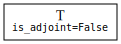

#### Counts totals:
 - `TGate()`: 1

In [5]:
from qualtran.resource_counting.generalizers import ignore_split_join
t_gate_g, t_gate_sigma = t_gate.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(t_gate_g)
show_counts_sigma(t_gate_sigma)

### Properties & Relations

We can create the "magic state" T|+> which is used via teleportation to do non-Clifford operations in the surface code.

[1.        +0.j         0.70710678+0.70710678j]


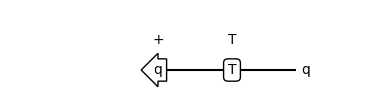

In [6]:
from qualtran.bloqs.basic_gates import PlusState

bb = BloqBuilder()
q = bb.add(PlusState())
q = bb.add(TGate(), q=q)
cbloq = bb.finalize(q=q)
show_bloq(cbloq, 'musical_score')
print(cbloq.tensor_contract() * np.sqrt(2))